<a href="https://colab.research.google.com/github/Geetika2282/Deep-Learning/blob/main/Fasttag_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('FastagFraudDetection.csv')

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
df.isna().sum()

,0
Transaction_ID,0
Timestamp,0
Vehicle_Type,0
FastagID,549
TollBoothID,0
Lane_Type,0
Vehicle_Dimensions,0
Transaction_Amount,0
Amount_paid,0
Geographical_Location,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

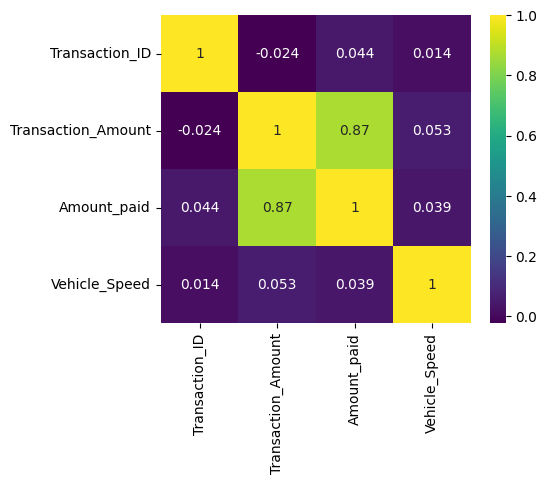

In [ ]:
# prompt: make a correlation matric

import matplotlib.pyplot as plt
# df.corr(numeric_only=True)
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()


In [ ]:
df.drop(columns=['Transaction_ID', 'Timestamp','FastagID','Vehicle_Speed','Vehicle_Plate_Number'], inplace=True)

In [ ]:
for i in df.columns:
    print(f"{i}\n", df[i].nunique())
    print("_____________________________")

Vehicle_Type
 7
_____________________________
TollBoothID
 6
_____________________________
Lane_Type
 2
_____________________________
Vehicle_Dimensions
 3
_____________________________
Transaction_Amount
 20
_____________________________
Amount_paid
 23
_____________________________
Geographical_Location
 5
_____________________________
Fraud_indicator
 2
_____________________________


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
ohe=OneHotEncoder(sparse_output=False)
le=LabelEncoder()
std=StandardScaler()

In [ ]:
x=df.drop('Fraud_indicator', axis=1)
y=df['Fraud_indicator']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4000, 7) (1000, 7) (4000,) (1000,)


In [ ]:
y_train_le=le.fit_transform(y_train)
y_test_le=le.transform(y_test)

In [ ]:
y_train_le

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
y_test_le

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

ct = make_column_transformer(
    (ohe, make_column_selector(dtype_include=object)),
    (std, make_column_selector(dtype_include=np.number)),
    remainder='passthrough'
).set_output(transform='pandas')


In [ ]:
x_train_ct = ct.fit_transform(x_train)
x_test_ct = ct.transform(x_test)

In [ ]:
x_train_ct

,onehotencoder__Vehicle_Type_Bus,onehotencoder__Vehicle_Type_Car,onehotencoder__Vehicle_Type_Motorcycle,onehotencoder__Vehicle_Type_SUV,onehotencoder__Vehicle_Type_Sedan,onehotencoder__Vehicle_Type_Truck,onehotencoder__Vehicle_Type_Van,onehotencoder__TollBoothID_A-101,onehotencoder__TollBoothID_B-102,onehotencoder__TollBoothID_C-103,...,onehotencoder__Vehicle_Dimensions_Large,onehotencoder__Vehicle_Dimensions_Medium,onehotencoder__Vehicle_Dimensions_Small,"onehotencoder__Geographical_Location_12.84197701525119, 77.67547528176169","onehotencoder__Geographical_Location_12.936687032945434, 77.53113977439017","onehotencoder__Geographical_Location_13.042660878688794, 77.47580097259879","onehotencoder__Geographical_Location_13.059816123454882, 77.77068662374292","onehotencoder__Geographical_Location_13.21331620748757, 77.55413526894684",standardscaler__Transaction_Amount,standardscaler__Amount_paid
4227,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.450016,-0.293350
4676,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.137062,0.036561
800,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.433584,-1.330213
3671,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.433584,-1.330213
4193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.181770,-0.010569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.807677,-0.670391
466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.181770,-0.010569
3092,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.450016,-0.293350
3772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.360601,-0.387610


In [ ]:
x_train_ct.isna().sum()

,0
onehotencoder__Vehicle_Type_Bus,0
onehotencoder__Vehicle_Type_Car,0
onehotencoder__Vehicle_Type_Motorcycle,0
onehotencoder__Vehicle_Type_SUV,0
onehotencoder__Vehicle_Type_Sedan,0
onehotencoder__Vehicle_Type_Truck,0
onehotencoder__Vehicle_Type_Van,0
onehotencoder__TollBoothID_A-101,0
onehotencoder__TollBoothID_B-102,0
onehotencoder__TollBoothID_C-103,0


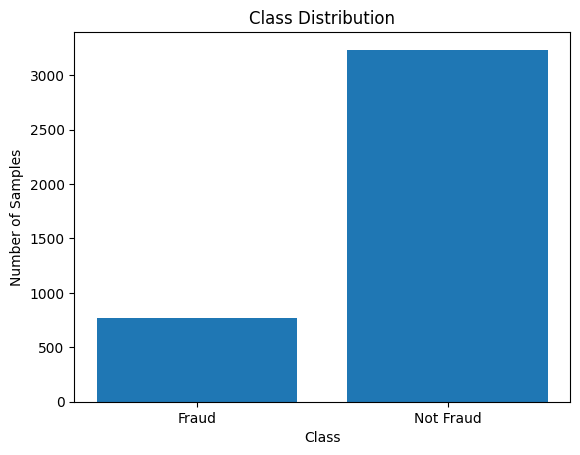

In [ ]:
# Example class labels (could be anything from 0 to N)
classes, counts = np.unique(y_train, return_counts=True)  # y_train is your target labels

# Create a bar chart
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()


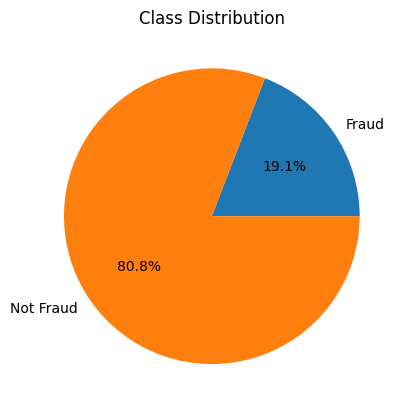

In [ ]:
plt.pie(counts, labels=classes, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

## The class is imbalanced but we can't do anything coz hume padhaya nahi hai; out of syllabus hai sir!!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Feedforward architecture

In [ ]:
x_train_ct.shape[1]

25

In [ ]:
model_ann = Sequential()

model_ann.add(Input(shape=(x_train_ct.shape[1],)))
# initializing model parameters with kernel_initializer
model_ann.add(Dense(64, kernel_initializer="he_normal", activation='relu'))
model_ann.add(Dense(32, kernel_initializer="he_normal", activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

In [ ]:
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_ann, show_shapes=True)

In [ ]:
model_ann.fit(x_train_ct, y_train_le, epochs=10, validation_data=(x_test_ct, y_test_le))

In [ ]:
model_ann.evaluate(x_test_ct, y_test_le)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = (model_ann.predict(x_test_ct) > 0.5).astype("int32")
# Generate the classification report
report = classification_report(y_test_le, y_pred)
print("Classification Report:\n", report)


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_le, y_pred)
print("Confusion Matrix:\n", cm)

In [ ]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_le, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_le, y_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
# You can also create a more formatted report:
def generate_report(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()
    return df_report

report_df = generate_report(y_test_le, y_pred)
print(report_df)

In [ ]:
report_df

In [ ]:

# Save the report (optional)
report_df.to_csv('classification_report.csv')
report.to_csv('report.csv')

In [ ]:
# prompt: how to generate a report for accuracy

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'model_ann' and 'x_test_ct', 'y_test_le' are defined from your previous code
y_pred = (model_ann.predict(x_test_ct) > 0.5).astype("int32")

# Generate the classification report
report = classification_report(y_test_le, y_pred)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(y_test_le, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test_le, y_pred)
print(f"Accuracy: {accuracy}")


# You can also create a more formatted report:
def generate_report(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()
    return df_report

report_df = generate_report(y_test_le, y_pred)
print(report_df)

